In [1]:
import pandas as pd
import numpy as np
import lightgbm as lgb
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from datetime import datetime
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [2]:
data = pd.read_csv('data_202512.csv', low_memory=False, encoding='ISO-8859-1')

In [3]:
data.head(3)

,STUDENT_NUMBER,STUDENT_NAME,GENDER,HOME_LANGUAGE,LANGUAGE_NAME,ETHNIC_GROUP_NAME,STATS_ETHNIC_GROUP,BIRTHDATE,STUDENT_TYPE,QUALIFICATION_CODE,...,SUCCESS,AMOUNT_AWARDED,NSFAS_BURSARY_Y_N,NUMBER_MATRIC_SUBJECTS,MATRIC_SYMBOL,MATRIC_RATIO,RESIDENCE,EXAM_MARK,FINAL_MARK,TEST_MARK
0,222193913,MISS LL MTEMBU,F,K,XHOSA,BLACK,AFRICAN,2004-10-02 00:00:00.0000000,N,WS5585,...,1,4400.0,N,7,32.0,0.218750,NaN,49.142857,57.600000,54.314815
1,220208328,MS KL KHOHLISO,F,K,XHOSA,BLACK,AFRICAN,1999-11-12 00:00:00.0000000,N,WS7050,...,0,69600.0,Y,7,26.0,0.269231,CONNISTON COURT,32.000000,44.000000,51.260000
2,221523715,MR L VININDWA,M,K,XHOSA,BLACK,AFRICAN,1993-10-10 00:00:00.0000000,N,WS5046,...,0,10854.0,N,7,36.0,0.194444,NaN,0.000000,11.333333,15.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88847 entries, 0 to 88846
Data columns (total 42 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   STUDENT_NUMBER           88847 non-null  int64  
 1   STUDENT_NAME             88847 non-null  object 
 2   GENDER                   88847 non-null  object 
 3   LANGUAGE_NAME            88847 non-null  object 
 4   ETHNIC_GROUP_NAME        88847 non-null  object 
 5   STATS_ETHNIC_GROUP       88847 non-null  object 
 6   BIRTHDATE                88847 non-null  object 
 7   STUDENT_TYPE             88847 non-null  object 
 8   QUALIFICATION_CODE       88847 non-null  object 
 9   QUALIFICATION_NAME       88847 non-null  object 
 10  FTEN_STATUS_THIS_YEAR    88847 non-null  object 
 11  DEPARTMENT_NAME          88847 non-null  object 
 12  FACULTY_SCHOOL_NAME      88847 non-null  object 
 13  OFFERING_TYPE_CODE       88847 non-null  object 
 14  OFFERING_TYPE         

In [4]:
data.PASS_FAIL.value_counts()

PASS_FAIL
P    81245
F    23721
Name: count, dtype: int64

In [5]:
data.LANGUAGE_NAME.value_counts()

LANGUAGE_NAME
XHOSA                     88689
ZULU                       8851
SOTHO(SOUTH)               1932
ENGLISH                    1283
SOTHO(NORTH)               1173
TSONGA                      752
SWATI                       614
TSWANA                      558
VENDA                       528
OTHER AFRICAN LANGUAGE      247
NDEBELE                     189
AFRIKAANS                    78
AFRIKAANS/ENGLISH            60
SIGN LANGUAGE                 9
INDIAN                        2
EUROPEAN LANGUAGE             1
Name: count, dtype: int64

In [6]:
data.NSFAS_BURSARY_Y_N.value_counts()

NSFAS_BURSARY_Y_N
Y    90522
N     3371
Name: count, dtype: int64

In [7]:
data.CAMPUS_NAME.value_counts()

CAMPUS_NAME
Mthatha Campus         47173
Buffalo City Campus    22740
Butterworth Campus     21546
Queenstown Campus      13507
Name: count, dtype: int64

In [10]:
data.NATIONAL_LEVEL_DESC.value_counts()

NATIONAL_LEVEL_DESC
University Higher Certificate                    51478
Diplomas                                         43154
Professional Qualifications                       9270
National Certificates and Occupational Awards     1064
Name: count, dtype: int64

In [8]:
data.FTEN_STATUS_THIS_YEAR.value_counts()

FTEN_STATUS_THIS_YEAR
Non Entering           66586
First Time Entering    28318
Entering                8872
Transfer                1190
Name: count, dtype: int64

In [9]:
data.Rural_Urban.value_counts()

AttributeError: 'DataFrame' object has no attribute 'Rural_Urban'

In [11]:
data[["ACADEMIC_YEAR", "SUCCESS"]].groupby(['ACADEMIC_YEAR'], as_index=False).mean().sort_values(by='SUCCESS', ascending=False)

,ACADEMIC_YEAR,SUCCESS
0,2021,0.796069
3,2024,0.783201
1,2022,0.767128
2,2023,0.748159


In [12]:
data[["GENDER", "SUCCESS"]].groupby(['GENDER'], as_index=False).mean().sort_values(by='SUCCESS', ascending=False)

,GENDER,SUCCESS
0,F,0.820180
1,M,0.708647


In [13]:
data[["CAMPUS_NAME", "SUCCESS"]].groupby(['CAMPUS_NAME'], as_index=False).mean().sort_values(by='SUCCESS', ascending=False)

,CAMPUS_NAME,SUCCESS
3,Queenstown Campus,0.826831
2,Mthatha Campus,0.810972
1,Butterworth Campus,0.747935
0,Buffalo City Campus,0.690677


In [14]:
data[["NSFAS_BURSARY_Y_N", "SUCCESS"]].groupby(['NSFAS_BURSARY_Y_N'], as_index=False).mean().sort_values(by='SUCCESS', ascending=False)

,NSFAS_BURSARY_Y_N,SUCCESS
1,Y,0.790957
0,N,0.717888


# Compare Pass and Fail Rates Across Different Categories

PASS_FAIL  Pass Rate  Fail Rate
GENDER                         
F           0.820180   0.179820
M           0.708647   0.291353


<Figure size 1000x600 with 0 Axes>

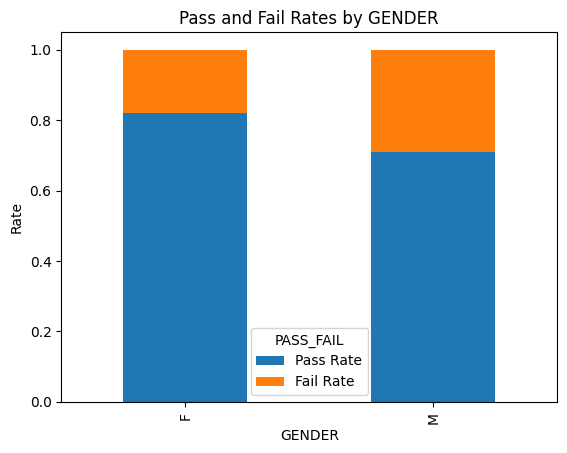

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming data is already loaded into the 'data' DataFrame
# Replace categorical_column with the column you want to analyze, e.g., 'GENDER', 'FACULTY_SCHOOL_NAME'
categorical_column = 'GENDER'  # Example

pass_fail_by_category = data.groupby([categorical_column, 'PASS_FAIL']).size().unstack()
pass_fail_by_category['Total'] = pass_fail_by_category.sum(axis=1)
pass_fail_by_category['Pass Rate'] = pass_fail_by_category['P'] / pass_fail_by_category['Total']
pass_fail_by_category['Fail Rate'] = pass_fail_by_category['F'] / pass_fail_by_category['Total']

print(pass_fail_by_category[['Pass Rate', 'Fail Rate']])

# Visualizing the pass and fail rates
plt.figure(figsize=(10, 6))
pass_fail_by_category[['Pass Rate', 'Fail Rate']].plot(kind='bar', stacked=True)
plt.title(f'Pass and Fail Rates by {categorical_column}')
plt.ylabel('Rate')
plt.show()


# Explore the Relationship Between Student Performance and Other Variables

# Statistical Tests

In [16]:
from scipy.stats import chi2_contingency

# Chi-squared test for a categorical variable against PASS_FAIL
# Replace categorical_column with the column you want to test, e.g., 'GENDER'
categorical_column = 'GENDER'  # Example

contingency_table = pd.crosstab(data[categorical_column], data['PASS_FAIL'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f'Chi-Squared Test for {categorical_column} vs PASS_FAIL')
print(f'Chi-Squared Value: {chi2}')
print(f'P-Value: {p}')


Chi-Squared Test for GENDER vs PASS_FAIL
Chi-Squared Value: 1810.2841824936786
P-Value: 0.0


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104966 entries, 0 to 104965
Data columns (total 43 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   STUDENT_NUMBER           104966 non-null  int64  
 1   STUDENT_NAME             104966 non-null  object 
 2   GENDER                   104966 non-null  object 
 3   HOME_LANGUAGE            104966 non-null  object 
 4   LANGUAGE_NAME            104966 non-null  object 
 5   ETHNIC_GROUP_NAME        104965 non-null  object 
 6   STATS_ETHNIC_GROUP       104965 non-null  object 
 7   BIRTHDATE                104966 non-null  object 
 8   STUDENT_TYPE             104966 non-null  object 
 9   QUALIFICATION_CODE       104966 non-null  object 
 10  QUALIFICATION_NAME       104966 non-null  object 
 11  FTEN_STATUS_THIS_YEAR    104966 non-null  object 
 12  DEPARTMENT_NAME          104966 non-null  object 
 13  FACULTY_SCHOOL_NAME      104966 non-null  object 
 14  OFFE

# DATA PREPROCESSING

In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from datetime import datetime
import pickle

# --- Load Data ---
data = pd.read_csv('data_202512.csv', low_memory=False, encoding='ISO-8859-1')

# --- Convert BIRTHDATE to datetime ---
data['BIRTHDATE'] = pd.to_datetime(data['BIRTHDATE'], errors='coerce')

# --- Calculate AGE (Current Year - Birth Year) ---
current_year = datetime.now().year
data['AGE'] = current_year - data['BIRTHDATE'].dt.year

# --- Handle Missing or Invalid BIRTHDATE (Replace with Mean Age) ---
mean_age = data['AGE'].mean()
data['AGE'].fillna(mean_age, inplace=True)

# --- Drop Unnecessary Columns ---
columns_to_drop = [
    'ETHNIC_GROUP_NAME', 'STUDENT_TYPE', 'QUALIFICATION_CODE', 'QUALIFICATION_NAME',
    'FACULTY_SCHOOL_NAME', 'SECONDARY_SCHOOL_NAME', 'RESULT_DESCRIPTION', 'SECONDARY_SCHOOL',
    'PASS_FAIL', 'STUDENT_NUMBER', 'STUDENT_NAME', 'ACADEMIC_YEAR', 'TITLE', 'INITIALS',
    'BIRTHDATE', 'DEPARTMENT_NAME', 'OFFERING_TYPE_CODE', 'TRANSACTION_DATE', 'QUALIFICATION_TYPE',
    'STATS_ETHNIC_GROUP', 'FIRST_NAMES', 'SURNAME', 'FINAL_MARK', 'MARITAL_STATUS','HOME_LANGUAGE','STUDENT_EMAIL','EXAM_MARK'
]
data.drop(columns=columns_to_drop, inplace=True)

# --- Handle RESIDENCE Column ---
data['RESIDENCE'] = data['RESIDENCE'].notna().astype(int)

# --- Encode LANGUAGE_NAME (XHOSA = 1, Others = 2) ---
data['LANGUAGE_NAME'] = data['LANGUAGE_NAME'].apply(lambda x: 1 if x == 'XHOSA' else 2)

# --- Encode STUDENT_FOUNDATION (Y=1, N=0) ---
data['STUDENT_FOUNDATION'] = data['STUDENT_FOUNDATION'].map({'Y': 1, 'N': 0})
data['STUDENT_FOUNDATION'].fillna(0, inplace=True)  # Assume missing means No Foundation

# --- Split Data into Features (X) and Target (y) ---
X = data.drop('SUCCESS', axis=1)
y = data['SUCCESS']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, stratify=y)

# --- Handle Missing Values ---
fillna_with_minus1 = ['MATRIC_SYMBOL', 'MATRIC_RATIO', 'AMOUNT_AWARDED']
X_train[fillna_with_minus1] = X_train[fillna_with_minus1].fillna(-1)
X_test[fillna_with_minus1] = X_test[fillna_with_minus1].fillna(-1)

# Fill numerical missing values with mean
numerical_cols = X_train.select_dtypes(include=['float64', 'int64']).columns.difference(fillna_with_minus1)
mean_values = X_train[numerical_cols].mean()
X_train[numerical_cols] = X_train[numerical_cols].fillna(mean_values)
X_test[numerical_cols] = X_test[numerical_cols].fillna(mean_values)

# --- Label Encode Categorical Variables ---
categorical_columns = ['GENDER', 'FTEN_STATUS_THIS_YEAR', 'MATRIC_TYPE_DESCRIPTION', 
                        'NATIONAL_LEVEL_DESC', 'NSFAS_BURSARY_Y_N', 'OFFERING_TYPE']
label_encoders = {}

for column in categorical_columns:
    le = LabelEncoder()
    X_train[column] = le.fit_transform(X_train[column].astype(str))
    
    # Handle unseen categories in X_test safely
    X_test[column] = X_test[column].apply(lambda x: le.transform([x])[0] if x in le.classes_ else le.classes_.size)
    
    label_encoders[column] = le

# Save Label Encoders
with open('label_encoders.pkl', 'wb') as f:
    pickle.dump(label_encoders, f)

# --- One-Hot Encoding for CAMPUS_NAME ---
one_hot_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

X_train_campus = one_hot_encoder.fit_transform(X_train[['CAMPUS_NAME']])
X_test_campus = one_hot_encoder.transform(X_test[['CAMPUS_NAME']])

campus_columns = one_hot_encoder.get_feature_names_out(['CAMPUS_NAME'])
X_train_campus_df = pd.DataFrame(X_train_campus, columns=campus_columns, index=X_train.index)
X_test_campus_df = pd.DataFrame(X_test_campus, columns=campus_columns, index=X_test.index)

# Drop original column and concatenate encoded data
X_train.drop('CAMPUS_NAME', axis=1, inplace=True)
X_test.drop('CAMPUS_NAME', axis=1, inplace=True)
X_train = pd.concat([X_train, X_train_campus_df], axis=1)
X_test = pd.concat([X_test, X_test_campus_df], axis=1)

# Save One-Hot Encoder
with open('one_hot_encoder.pkl', 'wb') as f:
    pickle.dump(one_hot_encoder, f)

# --- Scale Numerical Features ---
scaler = StandardScaler()
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

# Save Scaler
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

# --- Ensure Feature Consistency ---
common_features = X_train.columns.intersection(X_test.columns)
X_train = X_train[common_features]
X_test = X_test[common_features]

# --- Final Check for Categorical Data ---
print("\nChecking if any columns are still categorical (should be 0):")
print(X_train.select_dtypes(include=['object']).shape[1])  # Should be 0
print(X_test.select_dtypes(include=['object']).shape[1])  # Should be 0

# --- Save Processed Data ---
X_train.to_csv('X_train_preprocessed_scaled.csv', index=False)
X_test.to_csv('X_test_preprocessed_scaled.csv', index=False)
pd.DataFrame(y_train, columns=['SUCCESS']).to_csv('y_train.csv', index=False)
pd.DataFrame(y_test, columns=['SUCCESS']).to_csv('y_test.csv', index=False)

# Save Mean Values for Future Use
with open('training_data_means.pkl', 'wb') as f:
    pickle.dump(mean_values.to_dict(), f)

# Save Feature Names
with open('feature_names.pkl', 'wb') as f:
    pickle.dump(X_train.columns.tolist(), f)

print("\n✅ Preprocessing complete. All data is numeric. Ready for training!")


C:\Users\smmakola\AppData\Local\Temp\3\ipykernel_8476\109492481.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['AGE'].fillna(mean_age, inplace=True)
C:\Users\smmakola\AppData\Local\Temp\3\ipykernel_8476\109492481.py:40: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e


Checking if any columns are still categorical (should be 0):
0
0

✅ Preprocessing complete. All data is numeric. Ready for training!


In [19]:
print(X_train.dtypes)
print(X_test.dtypes)

GENDER                               int64
LANGUAGE_NAME                      float64
FTEN_STATUS_THIS_YEAR                int64
OFFERING_TYPE                        int64
NATIONAL_LEVEL_DESC                  int64
MATRIC_TYPE_DESCRIPTION              int64
STUDENT_FOUNDATION                 float64
AMOUNT_AWARDED                     float64
NSFAS_BURSARY_Y_N                    int64
NUMBER_MATRIC_SUBJECTS             float64
MATRIC_SYMBOL                      float64
MATRIC_RATIO                       float64
RESIDENCE                          float64
TEST_MARK                          float64
AGE                                  int32
CAMPUS_NAME_Buffalo City Campus    float64
CAMPUS_NAME_Butterworth Campus     float64
CAMPUS_NAME_Mthatha Campus         float64
CAMPUS_NAME_Queenstown Campus      float64
dtype: object
GENDER                               int64
LANGUAGE_NAME                      float64
FTEN_STATUS_THIS_YEAR                int64
OFFERING_TYPE                        int

# MODEL TRAINING

Original class distribution in training data:
1    73120
0    21349
Name: count, dtype: int64

Resampled class distribution:
1    54840
0    43872
Name: count, dtype: int64

Cross-Validation Scores: [0.86790255 0.86430634 0.87103637 0.86196941 0.86597103]
Mean CV Accuracy: 0.8662371369781768


c:\Users\smmakola\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:41:14] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


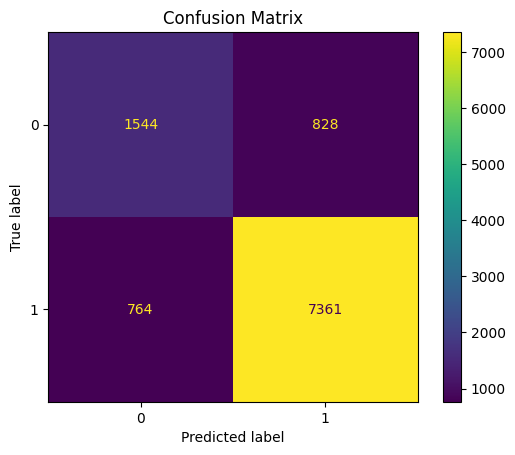


Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.65      0.66      2372
           1       0.90      0.91      0.90      8125

    accuracy                           0.85     10497
   macro avg       0.78      0.78      0.78     10497
weighted avg       0.85      0.85      0.85     10497



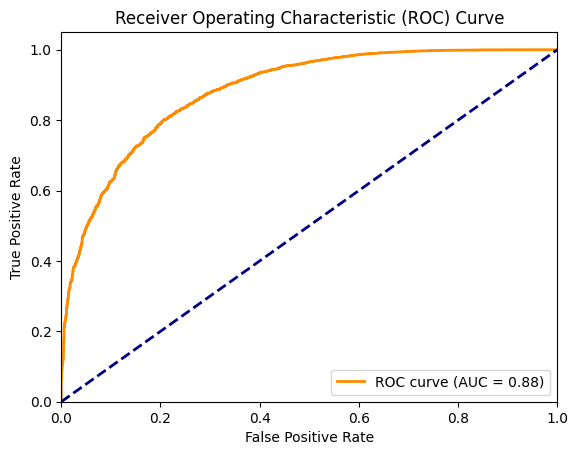

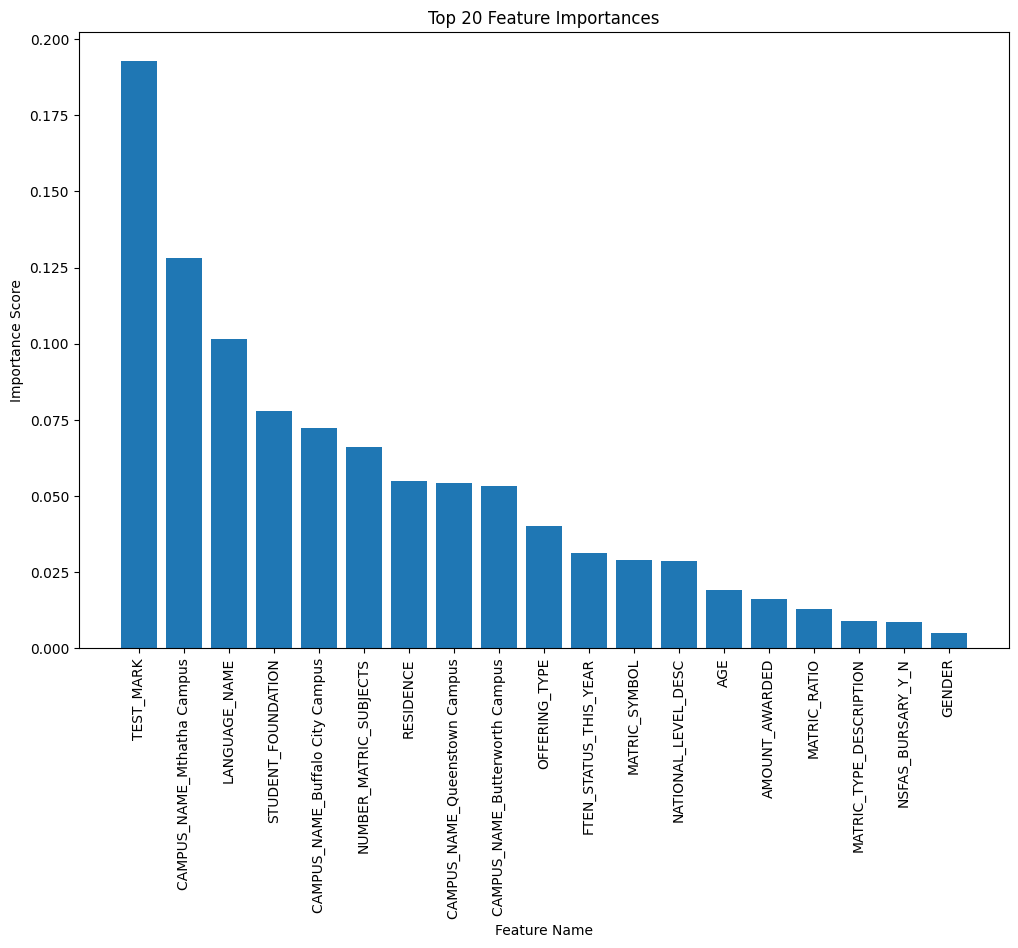


✅ Model training complete. Files saved successfully!


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, StratifiedKFold
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import pickle

# --- Load Preprocessed Data ---
X_train = pd.read_csv('X_train_preprocessed_scaled.csv')
X_test = pd.read_csv('X_test_preprocessed_scaled.csv')
y_train = pd.read_csv('y_train.csv')['SUCCESS'].values  # Ensure it's a 1D array
y_test = pd.read_csv('y_test.csv')['SUCCESS'].values

# --- Ensure Feature Consistency ---
common_features = X_train.columns.intersection(X_test.columns)
X_train = X_train[common_features]
X_test = X_test[common_features]

# --- Handle Missing Values ---
X_train.fillna(X_train.mean(), inplace=True)
X_test.fillna(X_train.mean(), inplace=True)  # Use training mean

# --- Check Class Distribution Before Resampling ---
print("Original class distribution in training data:")
print(pd.Series(y_train).value_counts())

# --- Apply Class Balancing (SMOTE + Random UnderSampling) ---
over = SMOTE(sampling_strategy=0.6, random_state=42)  # Oversample minority class to 60% of majority class
under = RandomUnderSampler(sampling_strategy=0.8, random_state=42)  # Undersample majority to 80% of its original size
pipeline = Pipeline(steps=[('oversample', over), ('undersample', under)])

# Apply Resampling
X_train_res, y_train_res = pipeline.fit_resample(X_train, y_train)

# Check class distribution after resampling
print("\nResampled class distribution:")
print(pd.Series(y_train_res).value_counts())

# --- Compute `scale_pos_weight` for XGBoost (Balances Class Weights) ---
class_counts = np.bincount(y_train_res)
scale_pos_weight = class_counts[0] / class_counts[1] if class_counts[1] > 0 else 1.0

# --- Initialize XGBoost Classifier ---
xgb_clf = XGBClassifier(
    random_state=42,
    n_estimators=400,       # Number of trees
    learning_rate=0.05,     # Helps prevent overfitting
    max_depth=6,            # Controls tree complexity
    scale_pos_weight=scale_pos_weight,  # Adjusts class imbalance
    eval_metric='logloss',
    use_label_encoder=False,
    n_jobs=-1
)

# --- Perform Cross-Validation ---
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(xgb_clf, X_train_res, y_train_res, cv=skf, scoring='accuracy', n_jobs=-1)

print("\nCross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))

# --- Train the Classifier ---
xgb_clf.fit(X_train_res, y_train_res)

# --- Make Predictions ---
predictions = xgb_clf.predict(X_test)

# --- Confusion Matrix ---
cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix")
plt.savefig('confusion_matrix.png')
plt.show()

# --- Classification Report ---
print("\nClassification Report:")
print(classification_report(y_test, predictions))

# --- ROC Curve ---
y_pred_prob = xgb_clf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.savefig('roc_curve.png')
plt.show()

# --- Feature Importance ---
importance = xgb_clf.feature_importances_
feature_names = X_train.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importance}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 8))
plt.bar(importance_df['Feature'][:20], importance_df['Importance'][:20])  # Show top 20 features
plt.xticks(rotation=90)
plt.title('Top 20 Feature Importances')
plt.xlabel('Feature Name')
plt.ylabel('Importance Score')
plt.savefig('feature_importance.png')
plt.show()

# --- Save Model & Encoders ---
with open('xgb_clf.pkl', 'wb') as f:
    pickle.dump(xgb_clf, f)

with open('feature_importance.pkl', 'wb') as f:
    pickle.dump(importance_df, f)

print("\n✅ Model training complete. Files saved successfully!")


# MODEL SCORING

In [22]:
import numpy as np
import pandas as pd
import pickle
import joblib

In [7]:
new_data = pd.read_csv('2025.csv', low_memory=False, encoding='ISO-8859-1')

In [8]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30431 entries, 0 to 30430
Data columns (total 54 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   STUDENT_NUMBER             30431 non-null  int64  
 1   STUDENT_NAME               30431 non-null  object 
 2   GENDER                     30431 non-null  object 
 3   HOME_LANGUAGE              30431 non-null  object 
 4   LANGUAGE_NAME              30431 non-null  object 
 5   ETHNIC_GROUP_NAME          30429 non-null  object 
 6   STATS_ETHNIC_GROUP         30429 non-null  object 
 7   BIRTHDATE                  30431 non-null  object 
 8   STUDENT_TYPE               30431 non-null  object 
 9   QUALIFICATION_CODE         30431 non-null  object 
 10  QUALIFICATION_NAME         30431 non-null  object 
 11  FTEN_STATUS_THIS_YEAR      30431 non-null  object 
 12  DEPARTMENT_NAME            30431 non-null  object 
 13  FACULTY_SCHOOL_NAME        30431 non-null  obj

In [9]:
import pandas as pd
import numpy as np
import joblib
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from datetime import datetime
import pickle

# --- Load New Data ---
new_data = pd.read_csv('2025.csv', low_memory=False, encoding='ISO-8859-1')

# --- Convert BIRTHDATE to datetime & Compute AGE ---
new_data['BIRTHDATE'] = pd.to_datetime(new_data['BIRTHDATE'], errors='coerce')
current_year = datetime.now().year
new_data['AGE'] = current_year - new_data['BIRTHDATE'].dt.year
mean_age = new_data['AGE'].mean()
new_data['AGE'].fillna(mean_age, inplace=True)

# --- Drop Unnecessary Columns ---
columns_to_drop = [
    'ETHNIC_GROUP_NAME', 'STUDENT_TYPE', 'QUALIFICATION_CODE', 'QUALIFICATION_NAME',
    'FACULTY_SCHOOL_NAME', 'SECONDARY_SCHOOL_NAME', 'RESULT_DESCRIPTION', 'SECONDARY_SCHOOL',
    'PASS_FAIL', 'STUDENT_NUMBER', 'STUDENT_NAME', 'ACADEMIC_YEAR', 'TITLE', 'INITIALS','ProvinceCD','SUCCESS',
    'BIRTHDATE', 'DEPARTMENT_NAME', 'OFFERING_TYPE_CODE', 'TRANSACTION_DATE', 'QUALIFICATION_TYPE',
    'STATS_ETHNIC_GROUP', 'FIRST_NAMES', 'SURNAME', 'FINAL_MARK', 'MARITAL_STATUS', 'Educators2023', 'GIS_Latitude', 'GIS_Longitude', 'Learners2023', 'NatEmis',
    'HOME_LANGUAGE','EXAM_MARK','HOME_LANGUAGE'
]
new_data_cleaned = new_data.drop(columns=[col for col in columns_to_drop if col in new_data.columns])

# --- Handle Missing Features (Funding, NSFAS, Residence) ---
safe_defaults = {
    'AMOUNT_AWARDED': -1,   # Funding still being finalized
    'NSFAS_BURSARY_Y_N': 'UNKNOWN',  # If missing, we assume it's still pending
    'RESIDENCE': 0  # Default to non-residence if unknown
}
for col, default_value in safe_defaults.items():
    if col not in new_data_cleaned:
        new_data_cleaned[col] = default_value

# --- Handle RESIDENCE Column ---
new_data_cleaned['RESIDENCE'] = new_data_cleaned['RESIDENCE'].notna().astype(int)

# --- Encode LANGUAGE_NAME (XHOSA = 1, Others = 2) ---
new_data_cleaned['LANGUAGE_NAME'] = new_data_cleaned['LANGUAGE_NAME'].apply(lambda x: 1 if x == 'XHOSA' else 2)

# --- Encode STUDENT_FOUNDATION (Y=1, N=0) ---
new_data_cleaned['STUDENT_FOUNDATION'] = new_data_cleaned['STUDENT_FOUNDATION'].map({'Y': 1, 'N': 0})
new_data_cleaned['STUDENT_FOUNDATION'].fillna(0, inplace=True)

# --- Ensure TEST_MARK and Indicator Feature ---
new_data['TEST_MARK_AVAILABLE'] = new_data['TEST_MARK'].notna().astype(int)
new_data['TEST_MARK'].fillna(-1, inplace=True)


# --- Fill Missing Values for Specific Columns ---
fillna_with_minus1 = ['MATRIC_SYMBOL', 'MATRIC_RATIO', 'AMOUNT_AWARDED','AGE']
for col in fillna_with_minus1:
    if col in new_data_cleaned:
        new_data_cleaned[col].fillna(-1, inplace=True)

# Fill numerical missing values with mean from training data
with open('training_data_means.pkl', 'rb') as f:
    training_means = pickle.load(f)

numerical_cols = new_data_cleaned.select_dtypes(include=['float64', 'int64']).columns.difference(fillna_with_minus1)
for col in numerical_cols:
    if col in new_data_cleaned:
        new_data_cleaned[col].fillna(training_means.get(col, 0), inplace=True)  # Default to 0 if not in means

# --- Label Encode Categorical Variables ---
categorical_columns = ['GENDER', 'FTEN_STATUS_THIS_YEAR', 'MATRIC_TYPE_DESCRIPTION', 
                        'NATIONAL_LEVEL_DESC', 'NSFAS_BURSARY_Y_N', 'OFFERING_TYPE']

with open('label_encoders.pkl', 'rb') as f:
    label_encoders = pickle.load(f)

for column in categorical_columns:
    if column in new_data_cleaned:
        le = label_encoders[column]
        new_data_cleaned[column] = new_data_cleaned[column].apply(lambda x: le.transform([x])[0] if x in le.classes_ else le.classes_.size)
    else:
        new_data_cleaned[column] = 0  # Default for missing categorical columns

# --- One-Hot Encoding for CAMPUS_NAME ---
with open('one_hot_encoder.pkl', 'rb') as f:
    one_hot_encoder = pickle.load(f)

if 'CAMPUS_NAME' in new_data_cleaned:
    campus_encoded = one_hot_encoder.transform(new_data_cleaned[['CAMPUS_NAME']])
    campus_encoded_df = pd.DataFrame(campus_encoded, columns=one_hot_encoder.get_feature_names_out(['CAMPUS_NAME']), index=new_data_cleaned.index)
    new_data_cleaned.drop('CAMPUS_NAME', axis=1, inplace=True)
    new_data_cleaned = pd.concat([new_data_cleaned, campus_encoded_df], axis=1)

# --- Ensure Feature Consistency with Trained Model ---
with open('feature_names.pkl', 'rb') as f:
    feature_names = pickle.load(f)

for col in feature_names:
    if col not in new_data_cleaned:
        new_data_cleaned[col] = 0  # Add missing columns with default value

new_data_cleaned = new_data_cleaned[feature_names]

# --- Scale Numerical Features ---
with open('scaler.pkl', 'rb') as f:
    scaler = pickle.load(f)

new_data_cleaned[numerical_cols] = scaler.transform(new_data_cleaned[numerical_cols])

# --- Load Trained Model & Perform Predictions ---
model = joblib.load('xgb_clf.pkl')
class_predictions = model.predict(new_data_cleaned)
probs = model.predict_proba(new_data_cleaned)[:, 1] * 100  # Probability of success

# --- Define Success Score Binning ---
def binning(probabilities):
    return ['Very Low' if p < 20 else 
            'Low' if 20 <= p < 50 else 
            'Moderate' if 50 <= p < 75 else 
            'High' if 75 <= p < 85 else 
            'Very High' for p in probabilities]

new_data_cleaned['Prediction'] = class_predictions
new_data_cleaned['Probability'] = probs
new_data_cleaned['Success_Scores'] = binning(probs)

def actionable_insights(row):
    insights = []
    if row['Success_Scores'] in ['Very Low', 'Low']:
        if row.get('NSFAS_BURSARY_Y_N') == 0:
            insights.append("Explore Financial Literacy Workshops.")
        if row.get('FTEN_STATUS_THIS_YEAR') == 1 or row.get('QUINTILE') in ['Q1', 'Q2', 'Q3'] or row.get('NoFeeSchool') == 'YES' or row.get('MATRIC_SYMBOL', 100) < 30:
            insights.append("Join Academic Support Programs.")
        if row.get('SUBJECT_FAILED', 0) > 1 and row.get('GENDER', 0) == 1:
            insights.append("Join the MALE Student Success Program.")
        if row.get('SUBJECT_FAILED', 0) > 3:
            insights.append("Attend the Time Management & Coping Skills Workshops.")
            
        if not insights:
            insights.append("Consult with an advisor for personalized guidance and support.")
    else:
        insights.append("Maintain your positive trajectory towards success.")
    return '; '.join(insights)
new_data_cleaned['Actionable Insights'] = new_data_cleaned.apply(actionable_insights, axis=1)


# --- Define Outcome Based on Success Scores ---
new_data_cleaned['Outcome'] = new_data_cleaned['Success_Scores'].apply(lambda x: 'At Risk' if x in ['Very Low', 'Low'] else 'On Track')

# --- Merge Insights & Scores with Original Data ---
final_data = pd.concat([new_data, new_data_cleaned[['Prediction', 'Probability', 'Success_Scores', 'Actionable Insights', 'Outcome']]], axis=1)

# --- Save Final Data ---
final_data.to_csv('updated_student_data_with_insights.csv', index=False)

print("✅ Updated data with actionable insights saved successfully.")


C:\Users\smmakola\AppData\Local\Temp\3\ipykernel_7912\1445087390.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  new_data['AGE'].fillna(mean_age, inplace=True)
C:\Users\smmakola\AppData\Local\Temp\3\ipykernel_7912\1445087390.py:47: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.


✅ Updated data with actionable insights saved successfully.


In [ ]:
new_data

In [5]:
final_data

,STUDENT_NUMBER,STUDENT_NAME,GENDER,HOME_LANGUAGE,LANGUAGE_NAME,ETHNIC_GROUP_NAME,STATS_ETHNIC_GROUP,BIRTHDATE,STUDENT_TYPE,QUALIFICATION_CODE,...,NoFeeSchool,Rural_Urban,QUINTILE,AGE,TEST_MARK_AVAILABLE,Prediction,Probability,Success_Scores,Actionable Insights,Outcome
0,221175911,MR NK NDYEBO,M,E,ENGLISH,BLACK,AFRICAN,2001-07-17,N,W62005,...,YES,Urban,Q2,24,0,1,79.004059,High,Maintain your positive trajectory towards succ...,On Track
1,219334889,MISS A JEKWA,F,K,XHOSA,BLACK,AFRICAN,1997-08-05,N,W63006,...,YES,Urban,Q3,28,0,1,60.957672,Moderate,Maintain your positive trajectory towards succ...,On Track
2,220141037,MISS A FUDUMELE,F,K,XHOSA,BLACK,AFRICAN,2000-11-11,N,W61026,...,NaN,NaN,NaN,25,0,0,39.105537,Low,Join Academic Support Programs.,At Risk
3,222374217,MISS S LANGA,F,K,XHOSA,BLACK,AFRICAN,2001-11-15,N,W64005,...,YES,Rural,Q3,24,0,1,86.841049,Very High,Maintain your positive trajectory towards succ...,On Track
4,240507568,MR A PENDU,M,K,XHOSA,BLACK,AFRICAN,2003-01-02,N,W64021,...,YES,Rural,Q1,22,0,1,86.575127,Very High,Maintain your positive trajectory towards succ...,On Track
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30426,240003985,MISS ES LWALWENI,F,K,XHOSA,BLACK,AFRICAN,2002-10-07,N,W61016,...,YES,Rural,Q2,23,0,0,37.520397,Low,Join Academic Support Programs.,At Risk
30427,240053052,MISS A MANONO,F,K,XHOSA,BLACK,AFRICAN,2004-11-01,N,W62011,...,YES,Rural,Q1,21,0,1,91.099556,Very High,Maintain your positive trajectory towards succ...,On Track
30428,240228251,MISS S Nunu,F,K,XHOSA,BLACK,AFRICAN,2004-03-27,N,W66001,...,NaN,NaN,NaN,21,0,1,60.331581,Moderate,Maintain your positive trajectory towards succ...,On Track
30429,230748090,MISS K JIKIJELA,F,K,XHOSA,BLACK,AFRICAN,2004-06-30,N,W62011,...,NaN,NaN,NaN,21,0,1,94.870789,Very High,Maintain your positive trajectory towards succ...,On Track


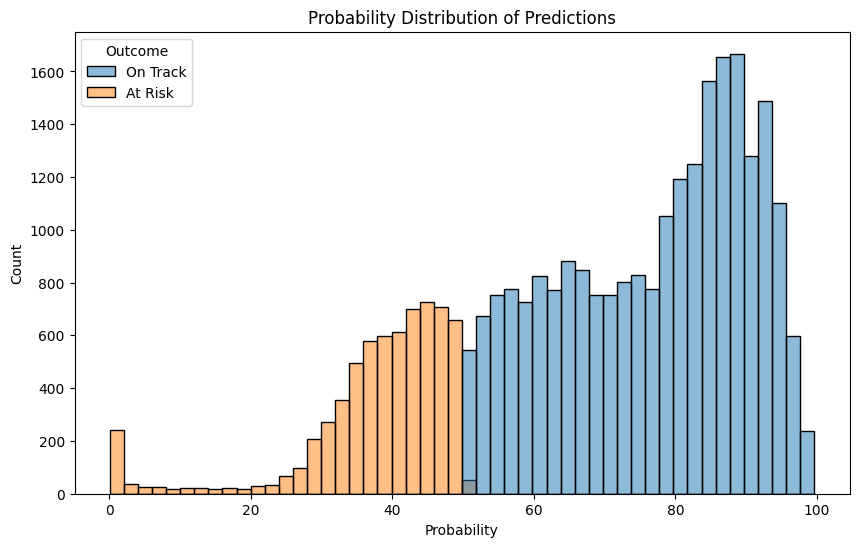

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your data with probabilities
final_data['Outcome'] = final_data['Prediction'].apply(lambda x: 'On Track' if x == 1 else 'At Risk')

# Plotting
plt.figure(figsize=(10, 6))
sns.histplot(data=final_data, x='Probability', hue='Outcome', bins=50, kde=False, stat="count")

# Add title and labels
plt.title('Probability Distribution of Predictions')
plt.xlabel('Probability')
plt.ylabel('Count')

# Show the plot
plt.show()

In [11]:
final_data['Success_Scores'].value_counts()

Success_Scores
Moderate     9592
Very High    8609
Low          6189
High         5593
Very Low      448
Name: count, dtype: int64